<a href="https://colab.research.google.com/github/IrinaKuzmanovic/PPPO_Project/blob/main/IT55_2018_PPPO_Klasifikacija_Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikacija fotografija**

Klasifikacija fotografija je osnovni zadatak masinskog ucenja koji pokusava da shvati celu sliku kao celinu. Cilj je klasifikovati sliku dodeljivanjem odredjenoj etiketi. Klasifikacija slika se obicno odnosi na slike na kojima se pojavljuje i analizira samo jedan objekat. Otkrivanje objekata ukljucuje i zadatke klasifikacije i lokalizacije i koristi se za analizu realisticnih slucajeva u kojima vise objekata moze postojati na slici.

Za projektni zadatak dobila sam dataset koji se sastoji od 4 foldera, od kojih je jedan ***images*** folder gde su smestene fotografije za treniranje.

U projektu sam koristila 5 algoritama za klasifikaciju:


1.   SGD Classifier
2.   Random Forest Classifier
3.   XGB Classifier
4.   KNeighbors Classifier
5.   SVM

Prvo sam ucitala dataset postavljen na Google Drive koji je potreban za izradu projektnog zadatka.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Unzipovan folder #4.zip u novi folder na Google Drive-u.

In [ ]:
!unzip  "/content/gdrive/MyDrive/Colab Notebooks/#4.zip" -d "/content/gdrive/MyDrive/Colab Notebooks/#4"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/#4.zip
  inflating: /content/gdrive/MyDrive/Colab Notebooks/#4/images.zip  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/#4/sample_submission.csv.zip  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/#4/test.csv.zip  
  inflating: /content/gdrive/MyDrive/Colab Notebooks/#4/train.csv.zip  


Importovane neophodne biblioteke ***numpy, pandas i os***. ***Numpy*** biblioteka daje podrsku visedimenzionalnim nizovima, a ***pandas*** sluzi za manipulaciju i analiziranje podataka, dok ***os*** sluzi za kreiranje i uklanjanje dorektorijuma, preuzimanje njegovog sadrzaja i lokaciju trenutnog direktorijuma.

U nastavku je uz pomoc os biblioteke generisani su nazivi datoteka u stablu direktorijuma.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/Colab Notebooks/#4'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/gdrive/My Drive/Colab Notebooks/#4/images.zip
/content/gdrive/My Drive/Colab Notebooks/#4/sample_submission.csv.zip
/content/gdrive/My Drive/Colab Notebooks/#4/test.csv.zip
/content/gdrive/My Drive/Colab Notebooks/#4/train.csv.zip


U narednim koracima ostali fajlovi su unzipovani iz glavnog direktorijuma #4.

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/My Drive/Colab Notebooks/#4/sample_submission.csv.zip') as z_samp:
    z_samp.extractall()

In [ ]:

import zipfile

with zipfile.ZipFile('/content/gdrive/My Drive/Colab Notebooks/#4/images.zip') as z_samp:
    z_samp.extractall()

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/My Drive/Colab Notebooks/#4/test.csv.zip') as z_samp:
    z_samp.extractall()
     

In [ ]:
import zipfile

with zipfile.ZipFile('/content/gdrive/My Drive/Colab Notebooks/#4/train.csv.zip') as z_samp:
    z_samp.extractall()

os.lisdir - ispisuje nazive fajlova koji se nalaze u direktorijumu.

In [ ]:
os.listdir()

['.config',
 'sample_submission.csv',
 'train.csv',
 'images',
 'test.csv',
 'gdrive',
 'sample_data']

Sledeca linija koda vraca broj fotografija u ***images*** folderu.

In [ ]:
len(os.listdir('images'))

1584

U narednom koraku instalirana je biblioteka *Matplotlib* za kreiranje statickih, animiranih i interaktivnih vizuelizacija, u ovom slucaju za iscrtavanje dijagrama.

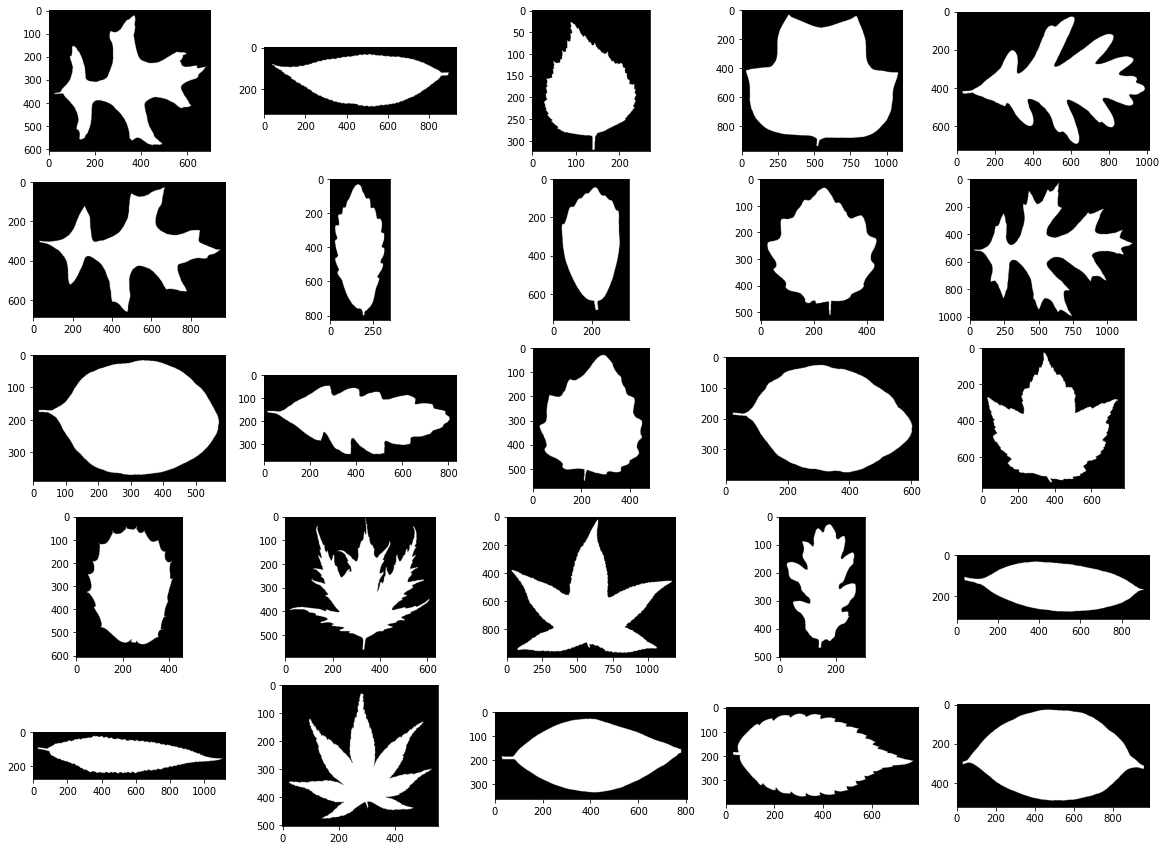

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras_preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))#nasumicno generise uzorak iz foldera images
    plt.subplot(5,5,i+1)#pomocu subplota mogu se iscrtati vise dijagrama na jednoj slici i prima tri argumenta(5-redova, 5-kolona,i+1-predstavlja index trenutnog plota)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

Pomocu ***pandas*** biblioteke smo iscitali podatke iz *train.csv* i *test.csv* fajlova.

In [ ]:
df=pd.read_csv('train.csv',index_col=False) #ne koristi se prva kolona kao index
dftest=pd.read_csv('test.csv',index_col=False)

Zatim sam prikazala podatke iz *train.csv* fajla.

In [ ]:

df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


Ovde su prikazani podaci iz *test.csv* fajla.

In [ ]:

dftest

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,1577,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,1579,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,1580,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


Zatim su importovane dve biblioteke ***LabelEncoder*** i ***StratifiedShuffleSplit***. ***LabelEncoder***  se koristi za pretvaranje kvalitativih podataka u numericke kvantitativne vrednosti u ovom slucaju kategorija *species* iz *train.csv* fajla.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


encoder=LabelEncoder()
le=encoder.fit(df.species)#dodeljuje atribut classes koji sadrzi samo jedinstvene vrednosti
labels=le.transform(df.species)#vrsi transformaciju u nove kategoricke podatke
classes=list(le.classes_)

In [ ]:
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [ ]:
print(dftest.columns)

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)


Pomocu df.drop uklonila sam *id* i *species* red iz* train.csv* fajla.

In [ ]:
df=df.drop(['id','species'],axis=1)#brise redove id i species, axios=1 predstavlja prvu kolonu
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)

In [ ]:

dftest
     

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


In [ ]:

dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


In [ ]:
print(f'Labels:',len(labels))

Labels: 990


Ispisane su jedinstvene vrednosti.

In [ ]:

uniquelables=np.unique(labels)
print(uniquelables)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


Vrsimo deljenje na test i trening podatke pomocu biblioteke ***train_test_split***.
Argumenti: *train_test_split* - naziv funkcije,*df* - ulazni podaci ,*labels*-ciljni vektor ulaznih podataka,
*test_size*-velicina podataka,
 *shuffle=true*-podela po nasumicnom redosledu,
 *stratify*-kako su podaci podeljeni








In [ ]:
# Split into validation (test) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

#SGD Classifier 

SGD predstavlja linearni klasifikator (Support Vector Machine, Logistička regresija) koji koristi stohastički gradijentni spust prilikom treniranja. Prilikom treniranja računa se gradijent funkcije gubitka i model ažurira promenom parametara modela kako bi se ova funkcija minimizovala.

**Stohastički gradijentni spust** je iterativna metoda za optimizaciju funkcije greške (loss/cost function). Predstavlja stohastičku aproksimaciju gradijentnog spusta, jer gradijent nije izračunat nad celim skupom podataka, već na delu.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model_1 = make_pipeline(StandardScaler(), SGDClassifier())

print(model_1.fit(X_train,y_train))

print(model_1.score(X_test,y_test))


y_pred = model_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
0.9747474747474747
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


# Random Forest Classifier

Random Forest, odnosno nasumična suma, je algoritam nadgledanog učenja koji gradi ansambl stabla odlučivanja. Stablo odlučivanja je model koji se gradi u obliku stabla koje se sastoji iz listova i grana, pri čemu svaka grana vodi do čvora u kom će se naći instance skupa podataka koje zadovoljavaju uslov vrednosti obeležja instance koji je definisan za datu granu. Svaki list ovog stabla nosi vrednost jedne od klasa, tako da se prolazeći kroz stablo proveravaju vrednosti atributa instance sve dok se instanca ne nađe u listu koji joj dodeljuje jednu od klasa.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = make_pipeline(StandardScaler(), RandomForestClassifier())

print(model_2.fit(X_train,y_train))

print(model_2.score(X_test,y_test))

y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])
0.9545454545454546
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


#  KNeighbors Classifier

Algoritam k najbližih suseda klasifikuje instancu posmatrajući k njoj najbližih suseda, tako što joj dodeljuje klasu kojoj pripada najveći broj njenih suseda.

Za klasifikator biblioteke sklearn defaultna vrednost broja suseda koji se razmatraju je 5.

In [ ]:

from sklearn import neighbors
model_3 = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier())

print(model_3.fit(X_train,y_train))

print(f'score Model:',model_3.score(X_test,y_test))

y_pred = model_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])
score Model: 0.9545454545454546
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


# XGB Classifier

In [ ]:

import xgboost as xgb
model_4 = make_pipeline(StandardScaler(),xgb.XGBClassifier())

print(model_4.fit(X_train,y_train))

print(f'score Model:',model_4.score(X_test,y_test))

y_pred = model_4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier', XGBClassifier(objective='multi:softprob'))])
score Model: 0.8838383838383839
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 1]]


# SVM

Cilj ovog algoritma je pronaći hyperplane u N-dimenzionalnom prostoru koji na najbolji način razdvaja instance različitih klasa.
Support vector-i su tačke koje su najbliže hyperplane-u i utiču na njegovu orijentaciju. Koristeći ove vektore, maksimizuje se margina klasifikatora, odnosno postiže se najbolje razdvajanje klasa u prostoru.
SVM je izvorno binarni klasifikator, pa se u slučaju klasifikacionog zadatka sa više klasa ovaj zadatak raščlanjuje na više binarnih klasifikacionih problema.

In [ ]:

from sklearn import svm
model_5= make_pipeline(StandardScaler(),svm.SVC(gamma=0.001, C=100.))

print(model_5.fit(X_train,y_train))

print(f'score Model:',model_5.score(X_test,y_test))

y_pred = model_5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001))])
score Model: 0.9848484848484849
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
models = pd.DataFrame({
    'Model': ['SGDClassifier','Random Forest Classifier','K Neighbors Classifier', 'XGB Classifier', 
              'svm'],

    'Score': [model_1.score(X_test,y_test)*100,
              model_2.score(X_test,y_test)*100,
              model_3.score(X_test,y_test)*100, 
              model_4.score(X_test,y_test)*100,
              model_5.score(X_test,y_test)*100]})
models.sort_values(by='Score', ascending=True)

,Model,Score
3,XGB Classifier,88.383838
1,Random Forest Classifier,95.454545
2,K Neighbors Classifier,95.454545
0,SGDClassifier,97.474747
4,svm,98.484848


In [ ]:
test_pred = model_5.predict(dftest)

In [ ]:
print(test_pred)

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 90 60 17 75 27 51 31 39 23 24  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 55 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 92 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 87 95  3 35 83 60 59 58  0 50 62 38 93 68 53

In [ ]:

sample_df=pd.read_csv('sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0       4         0.010101         0.010101   0.010101     0.010101   
1       7         0.010101         0.010101   0.010101     0.010101   
2       9         0.010101         0.010101   0.010101     0.010101   
3      12         0.010101         0.010101   0.010101     0.010101   
4      13         0.010101         0.010101   0.010101     0.010101   
..    ...              ...              ...        ...          ...   
589  1576         0.010101         0.010101   0.010101     0.010101   
590  1577         0.010101         0.010101   0.010101     0.010101   
591  1579         0.010101         0.010101   0.010101     0.010101   
592  1580         0.010101         0.010101   0.010101     0.010101   
593  1583         0.010101         0.010101   0.010101     0.010101   

     Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0         0.010101     0.010101         0.010101     0.010101     

In [ ]:

output = pd.DataFrame({'Id': test_id,
                       
                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()

,Id,Labels
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14


In [ ]:

final=pd.concat([output,sample_df],axis=1)
final.head()

,Id,Labels,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,51,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,50,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,1,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,19,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,14,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
